In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format="retina"

In [2]:
train_data = pd.read_csv("data/interactions_train.csv")
train_data.head(5)

,user_id,recipe_id,date,rating,u,i
0,2046,4684,2000-02-25,5.0,22095,44367
1,2046,517,2000-02-25,5.0,22095,87844
2,1773,7435,2000-03-13,5.0,24732,138181
3,1773,278,2000-03-13,4.0,24732,93054
4,2046,3431,2000-04-07,5.0,22095,101723


## EDA

### Count Users -> How many times did each user contribute?

In [22]:
user_counts = pd.DataFrame(train_data["user_id"].value_counts(sort=True)[:20])
user_counts = user_counts.rename(columns={"user_id": "user_counts"})

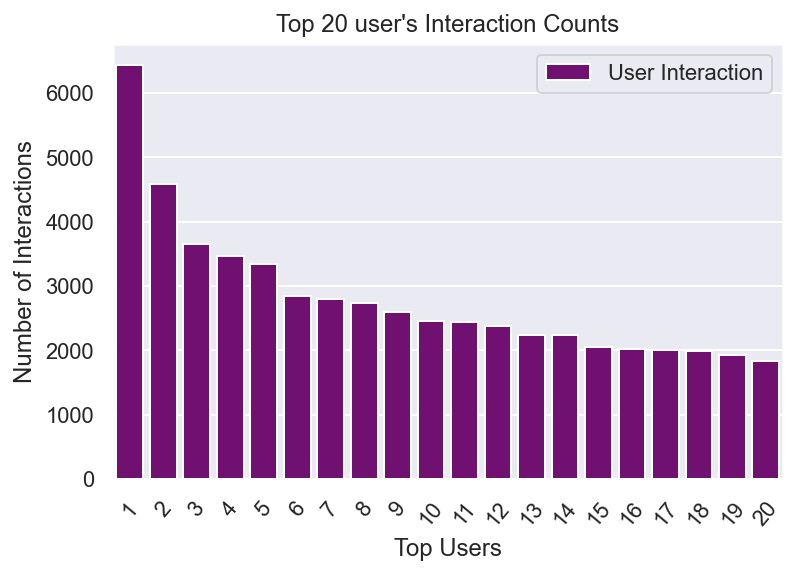

In [25]:
# Visualize the top 20 interactions of the user
bar = sns.barplot(data=user_counts, x=np.arange(1, len(user_counts) + 1),
                  y="user_counts", color="purple", label="User Interaction")
bar.tick_params(axis="x", rotation=50)
bar.set_xlabel("Top Users")
bar.set_ylabel("Number of Interactions")
bar.set_title("Top 20 user's Interaction Counts")
bar.legend()
plt.savefig("imgs/user_counts.png",dpi=200, bbox_inches = "tight")

### What percentage of the user population has less that 3 interaction?

In [5]:
user_counts = pd.DataFrame(train_data["user_id"].value_counts(sort=True))
user_counts = user_counts.rename(columns={"user_id": "user_counts"})
np.mean(user_counts < 3)[0]

0.18204657840165897

There are about 18.2 percent of users that have less than 3 interactions.

### Count Recipes -> How many times did each recipe be applied?

In [27]:
recipe_counts = pd.DataFrame(train_data["recipe_id"].value_counts()[:20])
recipe_counts = recipe_counts.rename(columns={"recipe_id": "recipe_counts"})

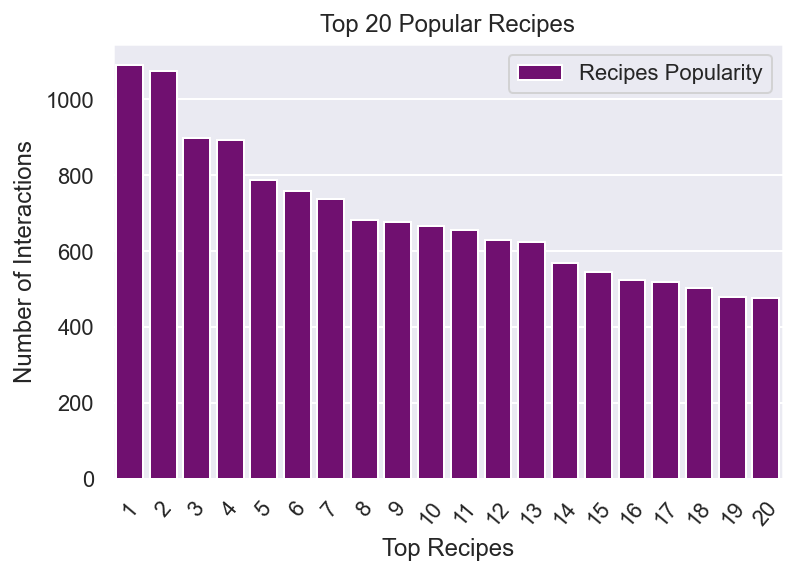

In [28]:
bar = sns.barplot(data=recipe_counts, x=np.arange(1, len(recipe_counts)+1),
                  y="recipe_counts", color="purple", label="Recipes Popularity")
bar.set_xlabel("Top Recipes")
bar.set_ylabel("Number of Interactions")
bar.set_title("Top 20 Popular Recipes")
bar.tick_params(axis="x", rotation=50)
bar.legend()
plt.savefig("imgs/recipes_counts.png",dpi=200, bbox_inches = "tight")

### What percentage of the recipes population has less than 3 reviews?

In [8]:
recipe_counts = pd.DataFrame(train_data["recipe_id"].value_counts())
recipe_counts = recipe_counts.rename(columns={"recipe_id": "recipe_counts"})
np.mean(recipe_counts < 3)[0]

0.6108476640915843

There are about 61.08 percent of recipes that has less than 3 reviews. It tells us that the popularity of a recipe is independent of the number of interactions on this platform. Some recipes have high popularity, and many users applied them many times. However, a large percentage of the recipes have low popularity and are only used by some users.

### Count Ratings -> How many times did each rating be assigned?

In [9]:
train_data.head()

,user_id,recipe_id,date,rating,u,i
0,2046,4684,2000-02-25,5.0,22095,44367
1,2046,517,2000-02-25,5.0,22095,87844
2,1773,7435,2000-03-13,5.0,24732,138181
3,1773,278,2000-03-13,4.0,24732,93054
4,2046,3431,2000-04-07,5.0,22095,101723


In [10]:
rating_counts = pd.DataFrame(train_data.groupby("rating").count()["user_id"])
rating_counts = rating_counts.rename(columns={"user_id": "rating_counts"})

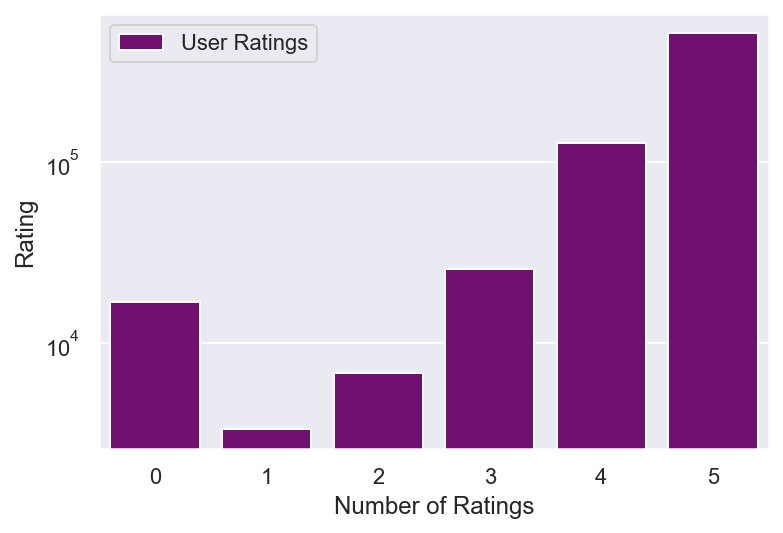

In [29]:
bar = sns.barplot(data=rating_counts, x=rating_counts.index.astype(int),
                  y="rating_counts", color="purple", label="User Ratings")
bar.set_xlabel("Number of Ratings")
bar.set_ylabel("Rating")
bar.set_yscale("log")
bar.legend()
plt.savefig("imgs/rating_counts.png", dpi=200, bbox_inches = "tight")

### Number of rows in each dataset

In [12]:
train_data.shape[0]

698901

In [13]:
test_data = pd.read_csv("data/interactions_test.csv")
valid_data = pd.read_csv("data/interactions_validation.csv")

In [14]:
test_data.shape[0]

12455

In [15]:
valid_data.shape[0]

7023

## Using the RAW file:

In [16]:
raw_interaction = pd.read_csv("data/RAW_interactions.csv")

Take a look at the raw review text of whom the rating is `0`

In [17]:
fil = raw_interaction["rating"] == 0
raw_interaction[fil].iloc[0]["review"]

'Just an observation, so I will not rate.  I followed this procedure with strawberries instead of raspberries.  Perhaps this is the reason it did not work well.  Sorry to report that the strawberries I did in August were moldy in October.  They were stored in my downstairs fridge, which is very cold and infrequently opened.  Delicious and fresh-tasting prior to that, though.  So, keep a sharp eye on them.  Personally I would not keep them longer than a month.  This recipe also appears as #120345 posted in July 2009, which is when I tried it.  I also own the Edna Lewis cookbook in which this appears.'

From the review text, we can infer that a rating of 0 represent that this user refused or did not rate this specific recipes. For our purposes, the rating of 0 will largely be dropped when we do rating analysis.

In [18]:
raw_recipes = pd.read_csv("data/RAW_recipes.csv")

In [19]:
raw_recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


The recipes contain metadata regarding the number of steps, description of steps, and ingredient infomation. If we are interested in investigating the goodness of a recipe, we have additional metadata of the recipes themselves to explore the possibilities of a model.